In [71]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [72]:
import sklearn.linear_model
from sklearn.linear_model import Perceptron
from sklearn.ensemble import BaggingClassifier
from scipy import  stats

In [73]:
rcParams['savefig.dpi']= 108

In [74]:
def gen_samples(n=100):
    x=stats.uniform(0,3).rvs(n)
    y=stats.uniform(-1,7).rvs(n)
    return c_[x,y]

def classify(X):
    x = X[:,0]
    return (-x+x**2>X[:,1]).astype(int)

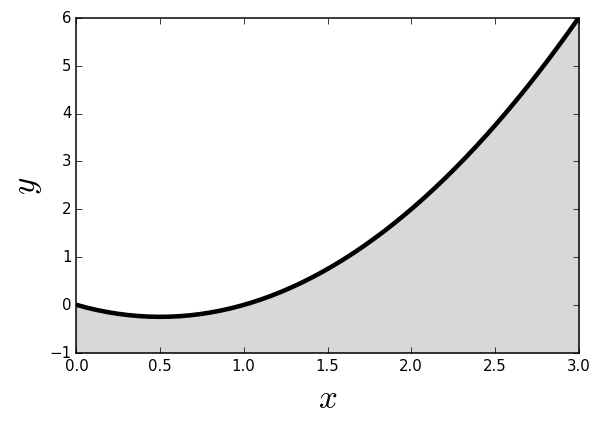

In [75]:
fig,ax=subplots()

xi = np.linspace(0,3,50)
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.fill_between(xi,-xi+xi**2,6,alpha=.3,color='w')
ax.fill_between(xi,-xi+xi**2,-1,alpha=.3,color='gray')
ax.set_xlabel('$x$',fontsize=22)
ax.set_ylabel('$y$',fontsize=22)
fig.savefig('../fig-machine_learning/ensemble_001.png')

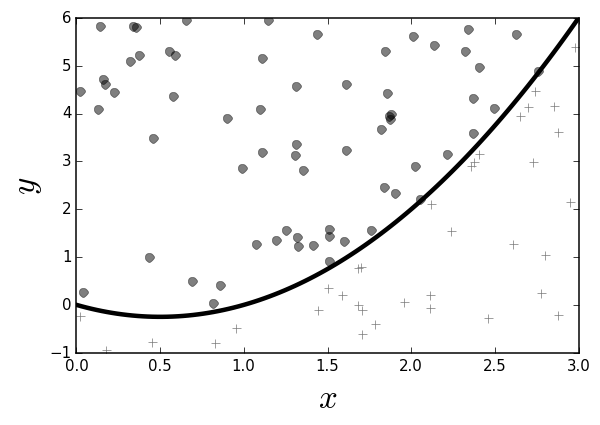

In [76]:
np.random.seed(1234)

Xtrain = gen_samples(100)
target = classify(Xtrain)

xi = np.linspace(0,3,100)
plot(xi,-xi+xi**2,'k',lw=3)
plot(*Xtrain[target==1,:].T,marker='+',color='gray',linestyle='none');
plot(*Xtrain[target==0,:].T,marker='o',color='k',linestyle='none',alpha=.5);
xlabel('$x$',fontsize=22)
ylabel('$y$',fontsize=22)

In [77]:
p=Perceptron()
p.fit(Xtrain,target)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

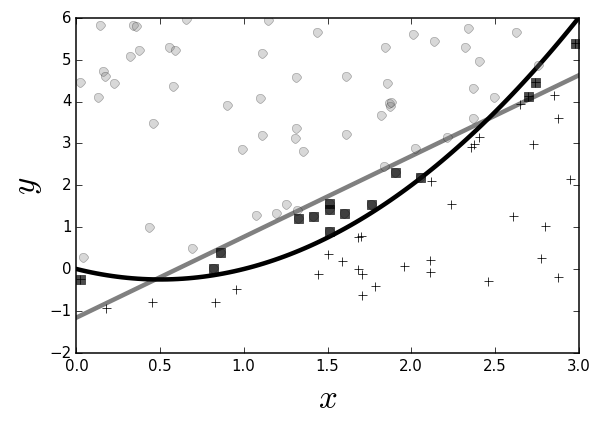

In [78]:
fig,ax=subplots()
ax.plot(xi,-p.coef_[0,0]*xi/p.coef_[0,1]- p.intercept_/p.coef_[0,1],lw=3,color='gray')
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='+',color='k',linestyle='')
ax.plot(*Xtrain[target==0,:].T,marker='o',color='gray',linestyle='',alpha=.3);
ax.plot(*Xtrain[p.predict(Xtrain)!=target].T,marker='s',color='k',linestyle='',alpha=.7)
ax.set_xlabel('$x$',fontsize=22)
ax.set_ylabel('$y$',fontsize=22)
fig.savefig('../fig-machine_learning/ensemble_002.png')

In [79]:
def get_perceptron_boundary(p,xi):
    return c_[xi,-p.coef_[0,0]*xi/p.coef_[0,1]- p.intercept_/p.coef_[0,1]]


In [80]:
bp = BaggingClassifier(Perceptron(),max_samples=0.50,n_estimators=3)
bp.fit(Xtrain,target)

BaggingClassifier(base_estimator=Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=3, n_jobs=1, oob_score=False,
         random_state=None, verbose=0)

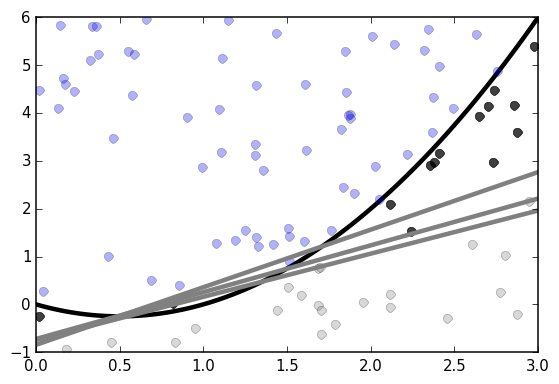

In [81]:
plot(xi,-xi+xi**2,'k',lw=3)
plot(*Xtrain[target==1,:].T,marker='o',color='gray',linestyle='',alpha=.3)
plot(*Xtrain[target==0,:].T,marker='o',color='b',linestyle='',alpha=.3);
plot(*Xtrain[bp.predict(Xtrain)!=target].T,marker='o',color='k',linestyle='',alpha=.7)
for i in bp.estimators_:
    tmp=get_perceptron_boundary(i,xi)
    plot(*tmp.T,color='gray',linestyle='-',lw=3)

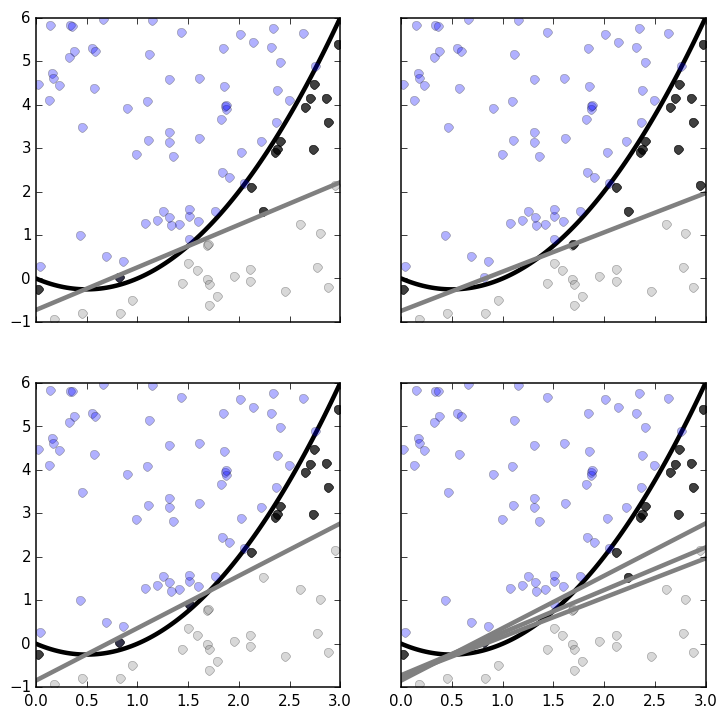

In [82]:
fig,axs= subplots(2,2,sharex=True,sharey=True)
fig.set_size_inches((8,8))
ax=axs[1,1]
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='o',color='gray',linestyle='',alpha=.3)
ax.plot(*Xtrain[target==0,:].T,marker='o',color='b',linestyle='',alpha=.3);
ax.plot(*Xtrain[bp.predict(Xtrain)!=target].T,marker='o',color='k',linestyle='',alpha=.7)
for i in bp.estimators_:
    tmp=get_perceptron_boundary(i,xi)
    ax.plot(*tmp.T,color='gray',linestyle='-',lw=3)
    
ax=axs[0,1]
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='o',color='gray',linestyle='',alpha=.3)
ax.plot(*Xtrain[target==0,:].T,marker='o',color='b',linestyle='',alpha=.3);
ax.plot(*Xtrain[bp.estimators_[0].predict(Xtrain)!=target].T,marker='o',color='k',linestyle='',alpha=.7)
tmp=get_perceptron_boundary(bp.estimators_[0],xi)
ax.plot(*tmp.T,color='gray',linestyle='-',lw=3)

ax=axs[1,0]
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='o',color='gray',linestyle='',alpha=.3)
ax.plot(*Xtrain[target==0,:].T,marker='o',color='b',linestyle='',alpha=.3);
ax.plot(*Xtrain[bp.estimators_[1].predict(Xtrain)!=target].T,marker='o',color='k',linestyle='',alpha=.7)
tmp=get_perceptron_boundary(bp.estimators_[1],xi)
ax.plot(*tmp.T,color='gray',linestyle='-',lw=3)

ax=axs[0,0]
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='o',color='gray',linestyle='',alpha=.3)
ax.plot(*Xtrain[target==0,:].T,marker='o',color='b',linestyle='',alpha=.3);
ax.plot(*Xtrain[bp.estimators_[2].predict(Xtrain)!=target].T,marker='o',color='k',linestyle='',alpha=.7)
tmp=get_perceptron_boundary(bp.estimators_[2],xi)
ax.plot(*tmp.T,color='gray',linestyle='-',lw=3)
ax.axis(ymin=-1,ymax=6)
fig.savefig('../fig-machine_learning/ensemble_003.png')


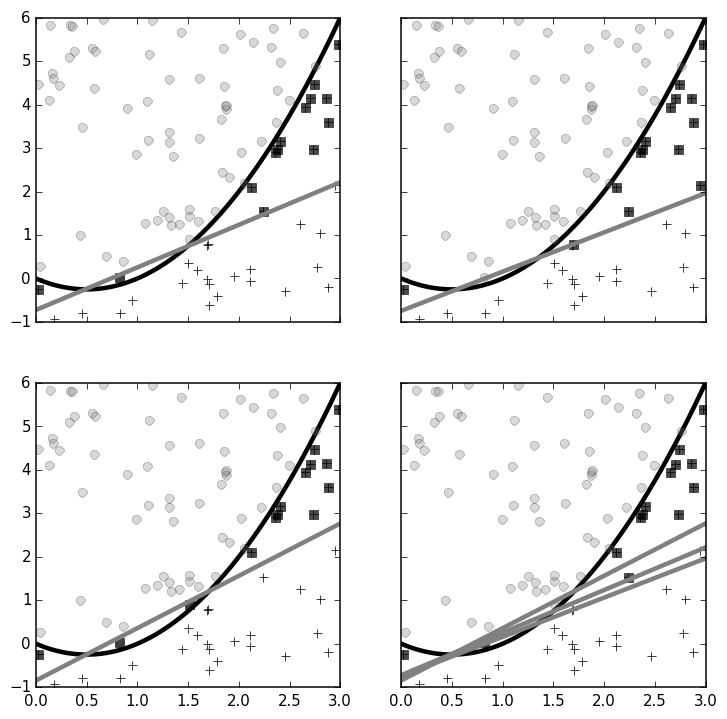

In [83]:
fig,axs= subplots(2,2,sharex=True,sharey=True)
fig.set_size_inches((8,8))
ax=axs[1,1]
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='+',color='k',linestyle='')
ax.plot(*Xtrain[target==0,:].T,marker='o',color='gray',linestyle='',alpha=.3);
ax.plot(*Xtrain[bp.predict(Xtrain)!=target].T,marker='s',color='k',linestyle='',alpha=.7)
for i in bp.estimators_:
    tmp=get_perceptron_boundary(i,xi)
    ax.plot(*tmp.T,color='gray',linestyle='-',lw=3)
    
ax=axs[0,1]
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='+',color='k',linestyle='')
ax.plot(*Xtrain[target==0,:].T,marker='o',color='gray',linestyle='',alpha=.3);
ax.plot(*Xtrain[bp.estimators_[0].predict(Xtrain)!=target].T,marker='s',color='k',linestyle='',alpha=.7)
tmp=get_perceptron_boundary(bp.estimators_[0],xi)
ax.plot(*tmp.T,color='gray',linestyle='-',lw=3)

ax=axs[1,0]
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='+',color='k',linestyle='')
ax.plot(*Xtrain[target==0,:].T,marker='o',color='gray',linestyle='',alpha=.3);
ax.plot(*Xtrain[bp.estimators_[1].predict(Xtrain)!=target].T,marker='s',color='k',linestyle='',alpha=.7)
tmp=get_perceptron_boundary(bp.estimators_[1],xi)
ax.plot(*tmp.T,color='gray',linestyle='-',lw=3)

ax=axs[0,0]
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='+',color='k',linestyle='')
ax.plot(*Xtrain[target==0,:].T,marker='o',color='gray',linestyle='',alpha=.3);
ax.plot(*Xtrain[bp.estimators_[2].predict(Xtrain)!=target].T,marker='s',color='k',linestyle='',alpha=.7)
tmp=get_perceptron_boundary(bp.estimators_[2],xi)
ax.plot(*tmp.T,color='gray',linestyle='-',lw=3)
ax.axis(ymin=-1,ymax=6)
fig.savefig('../fig-machine_learning/ensemble_003.png')


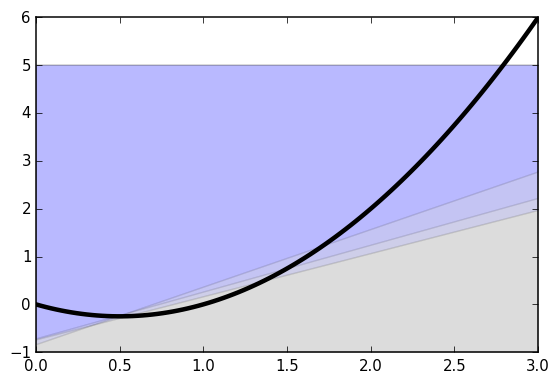

In [84]:
fig,ax= subplots()
tmp=get_perceptron_boundary(bp.estimators_[2],xi)
ax.fill_between(tmp[:,0],tmp[:,1],5,alpha=.1)
ax.fill_between(tmp[:,0],tmp[:,1],-1,alpha=.1,color='gray')

tmp=get_perceptron_boundary(bp.estimators_[1],xi)
ax.fill_between(tmp[:,0],tmp[:,1],5,alpha=.1)
ax.fill_between(tmp[:,0],tmp[:,1],-1,alpha=.1,color='gray')

tmp=get_perceptron_boundary(bp.estimators_[0],xi)
ax.fill_between(tmp[:,0],tmp[:,1],5,alpha=.1)
ax.fill_between(tmp[:,0],tmp[:,1],-1,alpha=.1,color='gray')

ax.plot(xi,-xi+xi**2,'k',lw=3)


In [85]:
print 'bp =',bp.score(Xtrain,target)
for n,i in enumerate(bp.estimators_):
    print n,i.score(Xtrain,target)

print 'p = ',p.score(Xtrain,target)

bp = 0.86
0 0.85
1 0.86
2 0.86
p =  0.85


## Test set

In [86]:
Xtest = gen_samples(300)
ytest = classify(Xtest)

In [87]:
print 'bp =',bp.score(Xtest,ytest)
for n,i in enumerate(bp.estimators_):
    print n,i.score(Xtest,ytest)

print 'p = ',p.score(Xtest,ytest)

bp = 0.89
0 0.883333333333
1 0.92
2 0.89
p =  0.913333333333


## More estimators

In [88]:
bp = BaggingClassifier(Perceptron(),max_samples=0.50,n_estimators=10)
bp.fit(Xtrain,target)

BaggingClassifier(base_estimator=Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0)

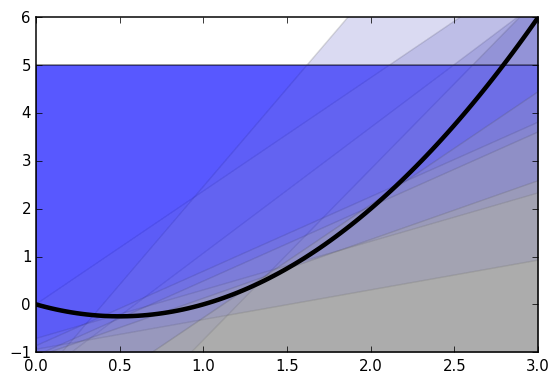

In [89]:

fig,ax=subplots()
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.axis(ymax=6 )

for i in bp.estimators_:
    tmp=get_perceptron_boundary(i,xi)
    ax.fill_between(tmp[:,0],tmp[:,1],5,alpha=.1)
    ax.fill_between(tmp[:,0],tmp[:,1],-1,alpha=.1,color='gray')

In [90]:
bp.score(Xtrain,target)

0.87

## Adaboost

In [91]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(Perceptron(),n_estimators=3,algorithm='SAMME',learning_rate=0.5)
clf.fit(Xtrain,target)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=3, random_state=None)

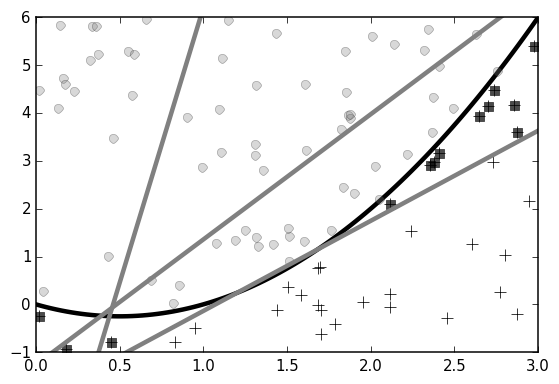

In [92]:
fig,ax= subplots()
ax.plot(xi,-xi+xi**2,'k',lw=3)
ax.plot(*Xtrain[target==1,:].T,marker='+',color='k',linestyle='',ms=8)
ax.plot(*Xtrain[target==0,:].T,marker='o',color='gray',linestyle='',alpha=.3);
ax.plot(*Xtrain[clf.predict(Xtrain)!=target].T,marker='s',color='k',linestyle='',alpha=.7)
for i in clf.estimators_:
    tmp=get_perceptron_boundary(i,xi)
    ax.plot(*tmp.T,color='gray',linestyle='-',lw=3)
ax.axis(ymax=6,ymin=-1 )
fig.savefig('../fig-machine_learning/ensemble_004.png')


In [93]:
print 'clf = ',clf.score(Xtrain,target)
print 'clf = ',clf.score(Xtest,ytest)

clf =  0.87
clf =  0.923333333333
